# [Airplane Seat Assignment Probability](https://leetcode.com/problems/airplane-seat-assignment-probability/)
- **Given**: `N` passengers with `N` seats
    + The 1st passenger will pick a random seat
    + After that, the other persons will pick their seat subsequently follows the rules
        + 1. Take their **own seat** if it is still available
        + 2. Pick other seats **randomly** when they find their seat occupied
- **Return**: the probability that the nth person gets his own seat

## Solution

```py
f(n) = 
    1/n                    # 1st person pick his own seat
    + 1/n * 0              # 1st person picks last one's seat, there's no chance the n-th person get his own seat
    + (n-2)/n * (          # 1st person picks one of the seats from 2nd to (n-1)th
        1/(n-2) * f(n-1) + # 1st person picks 2nd seat; 2nd person become the 1st person (pick a random seat) in f(n-1)
        1/(n-2) * f(n-2) + # 1st person picks 3rd seat; 2nd person pick his own seat; 3rd person become the 1st person in f(n-2)
        1/(n-3) * f(n-2) + # 1st person picks 3rd seat; 2nd,3rd person pick their own seat; 4th person become the 1st person in f(n-3)
        ...
        1/(n-2) * f(2)     # 1st person pick (n-1)th seat, ...
    )

=> f(n) = 1/n + 0 + 1/n * (f(n-1) + f(n-2) + ... + f(2))
        = 1/n * (f(n-1) + f(n-2) + ... + f(2) + 1)
        = 1/n * (f(n-1) + f(n-2) + ... + f(2) + f(1)) because f(1) = 1
```

**f(n) is a converged series**

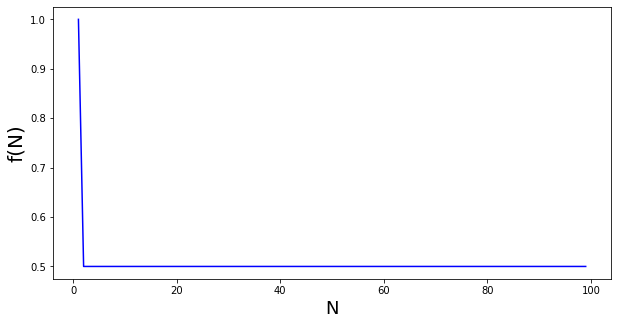

In [1]:
from functools import lru_cache
import numpy as np
import matplotlib.pyplot as plt

@lru_cache(maxsize=None)
def f(n):
    if n == 1: return 1.0
    ans = 0
    for i in range(1,n): ans += f(i)
    return 1/n * ans

N = np.arange(1, int(1e2), 1)
f_N = np.array([f(n) for n in N])

plt.figure(figsize=(10,5))
plt.plot(
    N, f_N,
    color='b', linewidth=1.5)
plt.xlabel('N', fontsize=18)
plt.ylabel('f(N)', fontsize=20)
plt.show()

#### Code

```Cpp
class Solution {
public:
    double nthPersonGetsNthSeat(int n) {
        if(n == 1) return 1.0;
        return 0.5;
    }
};
```